In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
# from torchaudio.utils import download_asset
# import torchaudio.functional as F
from IPython.display import Audio
import torch
import torchaudio
from IPython.display import Audio, display

/data/ephraim/CDiffuSE/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/ephraim/CDiffuSE/.venv/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [4]:
pkl_results_file = "SE_measures_pretrained_generic_obj_all.pickle"
with open(pkl_results_file, "rb") as handle:
    results = pickle.load(handle)

In [5]:
df = pd.DataFrame.from_dict(results)
df["pesq_diff"] = df["pesq_enhanced"].sub(df["pesq_noisy"])
df["stoi_diff"] = df["stoi_enhanced"].sub(df["stoi_noisy"])
df["stoi_est_diff"] = df["stoi_est_enhanced"].sub(df["stoi_est_noisy"])
df["pesq_est_diff"] = df["pesq_est_enhanced"].sub(df["pesq_est"])
df["sisdr_est_est_diff"] = df["sisdr_est_enhanced"].sub(df["sisdr_est_noisy"])
df["mos_est_diff"] = df["mos_est_enhanced"].sub(df["mos_est_noise"])

print(df.describe())

       pesq_noisy  stoi_noisy  stoi_est_noisy    pesq_est  sisdr_est_noisy  \
count  824.000000  824.000000      824.000000  824.000000       824.000000   
mean     1.970894    0.921046        0.959468    2.312226         8.567488   
std      0.752793    0.070918        0.052560    0.776100         5.629465   
min      1.031246    0.560032        0.642317    1.100813        -3.134989   
25%      1.290388    0.887391        0.946647    1.650657         2.725704   
50%      1.797897    0.940031        0.978557    2.240017         8.109539   
75%      2.552865    0.975415        0.994699    2.880762        12.656152   
max      4.300500    0.999815        0.999868    4.227460        23.890188   

       pesq_enhanced  stoi_enhanced  stoi_est_enhanced  pesq_est_enhanced  \
count     824.000000     824.000000         824.000000         824.000000   
mean        2.485738       0.911887           0.989347           3.125433   
std         0.546866       0.053772           0.021323           0

In [6]:
print(
    df[
        [
            "sisdr_est_noisy",
            "sisdr_est_enhanced",
            "mos_est_noise",
            "mos_est_enhanced"

        ]
    ].describe()
)

       sisdr_est_noisy  sisdr_est_enhanced  mos_est_noise  mos_est_enhanced
count       824.000000          824.000000     824.000000        824.000000
mean          8.567488           20.233893       2.657914          2.994785
std           5.629465            4.487247       0.622766          0.521250
min          -3.134989            8.274318       2.002665          2.002660
25%           2.725704           16.137329       2.079155          2.584637
50%           8.109539           20.840709       2.485631          3.079947
75%          12.656152           24.099137       3.132526          3.423149
max          23.890188           28.136868       4.994561          4.171928


In [7]:
(
    df[
        [
            "pesq_noisy",
            "stoi_noisy",
            "pesq_enhanced",
            "stoi_enhanced",
            "pesq_diff",
            "stoi_diff",
        ]
    ].describe()
)

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,1.970894,0.921046,2.485738,0.911887,0.514845,-0.009159
std,0.752793,0.070918,0.546866,0.053772,0.422548,0.024376
min,1.031246,0.560032,1.056885,0.548409,-1.262692,-0.062583
25%,1.290388,0.887391,2.140851,0.886999,0.257724,-0.025193
50%,1.797897,0.940031,2.574089,0.926333,0.539401,-0.016180
75%,2.552865,0.975415,2.886577,0.952019,0.771252,-0.000415
max,4.300500,0.999815,3.642150,0.980220,1.647539,0.100356


In [8]:
print(
    df[
        [
            "pesq_noisy",
            "pesq_enhanced",
            "stoi_noisy",
            "stoi_enhanced",
            "pesq_est",
            "pesq_est_enhanced",
            "stoi_est_noisy",
            "stoi_est_enhanced"
        ]
    ].describe()
)

       pesq_noisy  pesq_enhanced  stoi_noisy  stoi_enhanced    pesq_est  \
count  824.000000     824.000000  824.000000     824.000000  824.000000   
mean     1.970894       2.485738    0.921046       0.911887    2.312226   
std      0.752793       0.546866    0.070918       0.053772    0.776100   
min      1.031246       1.056885    0.560032       0.548409    1.100813   
25%      1.290388       2.140851    0.887391       0.886999    1.650657   
50%      1.797897       2.574089    0.940031       0.926333    2.240017   
75%      2.552865       2.886577    0.975415       0.952019    2.880762   
max      4.300500       3.642150    0.999815       0.980220    4.227460   

       pesq_est_enhanced  stoi_est_noisy  stoi_est_enhanced  
count         824.000000      824.000000         824.000000  
mean            3.125433        0.959468           0.989347  
std             0.641832        0.052560           0.021323  
min             1.311159        0.642317           0.732782  
25%           

In [9]:
print(
    df[
        [
            "stoi_diff",
            "stoi_est_diff",
            "pesq_diff",
            "pesq_est_diff",
            "sisdr_est_est_diff",
            "mos_est_diff"
        ]
    ].describe()
)

        stoi_diff  stoi_est_diff   pesq_diff  pesq_est_diff  \
count  824.000000     824.000000  824.000000     824.000000   
mean    -0.009159       0.029879    0.514845       0.813207   
std      0.024376       0.038482    0.422548       0.380698   
min     -0.062583      -0.109934   -1.262692      -0.836443   
25%     -0.025193       0.002869    0.257724       0.588929   
50%     -0.016180       0.016646    0.539401       0.871743   
75%     -0.000415       0.043874    0.771252       1.079712   
max      0.100356       0.208271    1.647539       1.772502   

       sisdr_est_est_diff  mos_est_diff  
count          824.000000    824.000000  
mean            11.666404      0.336871  
std              2.105273      0.458075  
min              1.192838     -1.052831  
25%             10.161902      0.019947  
50%             12.183467      0.314140  
75%             13.206152      0.625664  
max             16.679481      2.020365  


In [10]:
results["stoi_est_noisy"]["p257_211.wav"]

0.7921822667121887

In [11]:
# new_dict={"pesq_noisy": {}, "pesq_enhanced": {},"stoi_noisy": {}, "stoi_enhanced": {}}
# for filename,file_data in results.items():
#     # for noisy_enhanced, data_dic in file_data.items():
#     new_dict["pesq_noisy"][filename] = np.mean(file_data["noisy"]["pesq"])
#     new_dict["pesq_enhanced"][filename] = np.mean(file_data["enhanced"]["pesq"])
#     new_dict["stoi_noisy"][filename] = np.mean(file_data["noisy"]["stoi"])
#     new_dict["stoi_enhanced"][filename] = np.mean(file_data["enhanced"]["stoi"])


In [12]:
df = pd.DataFrame.from_dict(results)
df["pesq_diff"] = df["pesq_enhanced"].sub(df["pesq_noisy"])
df["stoi_diff"] = df["stoi_enhanced"].sub(df["stoi_noisy"])
df.head()

,pesq_noisy,stoi_noisy,stoi_est_noisy,pesq_est,sisdr_est_noisy,pesq_enhanced,stoi_enhanced,stoi_est_enhanced,pesq_est_enhanced,sisdr_est_enhanced,mos_est_noise,mos_est_enhanced,pesq_diff,stoi_diff
p232_001.wav,2.922585,0.896575,0.999820,3.706482,15.801972,2.743183,0.877639,0.999882,4.169001,26.796238,4.150528,3.754452,-0.179402,-0.018936
p232_002.wav,3.060069,0.969539,0.999250,3.390979,11.470918,3.236144,0.947898,0.997434,3.640864,22.706230,3.951606,3.873520,0.176075,-0.021641
p232_003.wav,2.807454,0.971781,0.999019,3.309171,7.092555,3.142090,0.949148,0.997851,3.683066,18.349648,3.475603,3.562142,0.334636,-0.022633
p232_005.wav,1.333063,0.881983,0.945982,1.431515,2.339334,1.902496,0.887424,0.978951,2.219635,11.176705,2.018214,2.065934,0.569433,0.005441
p232_006.wav,2.198710,0.965082,0.986035,2.603071,17.379326,2.703741,0.946626,0.998211,3.376114,25.812897,3.152938,3.525351,0.505030,-0.018455


In [13]:
df.describe().head()

,pesq_noisy,stoi_noisy,stoi_est_noisy,pesq_est,sisdr_est_noisy,pesq_enhanced,stoi_enhanced,stoi_est_enhanced,pesq_est_enhanced,sisdr_est_enhanced,mos_est_noise,mos_est_enhanced,pesq_diff,stoi_diff
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,1.970894,0.921046,0.959468,2.312226,8.567488,2.485738,0.911887,0.989347,3.125433,20.233893,2.657914,2.994785,0.514845,-0.009159
std,0.752793,0.070918,0.052560,0.776100,5.629465,0.546866,0.053772,0.021323,0.641832,4.487247,0.622766,0.521250,0.422548,0.024376
min,1.031246,0.560032,0.642317,1.100813,-3.134989,1.056885,0.548409,0.732782,1.311159,8.274318,2.002665,2.002660,-1.262692,-0.062583
25%,1.290388,0.887391,0.946647,1.650657,2.725704,2.140851,0.886999,0.990164,2.680485,16.137329,2.079155,2.584637,0.257724,-0.025193


<Axes: title={'center': 'stoi_diff'}, ylabel='Frequency'>

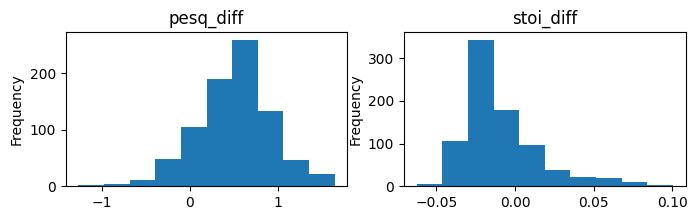

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
# fig, ax = plt.subplots((1, 2), figsize=(3, 2))
df["pesq_diff"].plot(kind="hist", ax=ax1, title="pesq_diff")
# fig2, ax2 = plt.subplots((2, 2), figsize=(3, 2))
df["stoi_diff"].plot(kind="hist", ax=ax2, title="stoi_diff")

In [15]:
import os


def display_all(df_):
    parent_dir = "/data/ephraim/datasets_16k/"
    clean, noisy, enhanced = (
        "/data/ephraim/datasets_16k/clean_testset_wav",
        "/data/ephraim/datasets_16k/noisy_testset_wav",
        "/data/ephraim/output/Enhanced/pretrained_base/model370200/test/voicebank_Noisy_Test",
    )
    for fname in df_.index:
        print("*********")
        print(fname)
        for type_ in [clean, noisy, enhanced]:
            path = os.path.join(type_, fname)
            print(path)
            display(Audio(path, rate=16000, autoplay=False))

In [16]:
display_all(df.nsmallest(3,['pesq_noisy']))

*********
p257_050.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_050.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_050.wav


/data/ephraim/output/Enhanced/pretrained_base/model370200/test/voicebank_Noisy_Test/p257_050.wav


*********
p257_151.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_151.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_151.wav


/data/ephraim/output/Enhanced/pretrained_base/model370200/test/voicebank_Noisy_Test/p257_151.wav


*********
p257_291.wav
/data/ephraim/datasets_16k/clean_testset_wav/p257_291.wav


/data/ephraim/datasets_16k/noisy_testset_wav/p257_291.wav


/data/ephraim/output/Enhanced/pretrained_base/model370200/test/voicebank_Noisy_Test/p257_291.wav


In [17]:
df.nsmallest(5,['pesq_noisy'])

,pesq_noisy,stoi_noisy,stoi_est_noisy,pesq_est,sisdr_est_noisy,pesq_enhanced,stoi_enhanced,stoi_est_enhanced,pesq_est_enhanced,sisdr_est_enhanced,mos_est_noise,mos_est_enhanced,pesq_diff,stoi_diff
p257_050.wav,1.031246,0.639657,0.677686,1.124621,0.252695,1.056885,0.708385,0.807572,1.607650,12.957177,2.017049,2.750272,0.025639,0.068728
p257_151.wav,1.036140,0.672111,0.662185,1.112064,1.426950,1.174945,0.759120,0.843293,1.311159,11.519608,2.151405,2.005374,0.138805,0.087009
p257_291.wav,1.036283,0.603448,0.842716,1.202042,-1.618032,1.065225,0.646295,0.732782,1.937577,12.920434,2.039661,2.354568,0.028942,0.042847
p257_427.wav,1.037009,0.709697,0.785739,1.133505,1.143589,1.170135,0.762424,0.918144,1.730782,12.838611,2.028244,2.008140,0.133127,0.052727
p257_171.wav,1.040026,0.741772,0.834325,1.112220,1.099493,1.091700,0.842128,0.959890,1.661933,13.531547,2.023852,2.018311,0.051674,0.100356


In [1]:
df2 = df[
    [
        "pesq_noisy",
        "stoi_noisy",
        "pesq_enhanced",
        "stoi_enhanced",
        "pesq_diff",
        "stoi_diff",
    ]
]
df2.describe()

NameError: name 'df' is not defined

In [21]:
df2.nsmallest(50, ["pesq_noisy"]).describe()

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.073243,0.798540,1.508743,0.835711,0.435500,0.037172
std,0.021091,0.077330,0.347364,0.061843,0.335963,0.030535
min,1.031246,0.603448,1.056885,0.646295,0.016822,-0.023009
25%,1.055638,0.756045,1.212138,0.803745,0.134562,0.014645
50%,1.075446,0.802397,1.457762,0.844890,0.389536,0.035508
75%,1.090291,0.852728,1.724127,0.875144,0.630741,0.057058
max,1.104712,0.935811,2.371272,0.923648,1.266561,0.100356


In [22]:
df2.nlargest(50, ["pesq_noisy"]).describe()

,pesq_noisy,stoi_noisy,pesq_enhanced,stoi_enhanced,pesq_diff,stoi_diff
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.596466,0.987558,3.254956,0.953984,-0.341509,-0.033574
std,0.228835,0.014495,0.182397,0.018203,0.278696,0.008987
min,3.326328,0.921624,2.713094,0.868472,-1.262692,-0.062583
25%,3.414954,0.981811,3.147079,0.949271,-0.456513,-0.036085
50%,3.542273,0.993252,3.241549,0.960662,-0.287359,-0.031408
75%,3.712383,0.997092,3.364420,0.966107,-0.160876,-0.028486
max,4.300500,0.999815,3.642150,0.973421,0.132478,-0.018161
